In [1]:
%load_ext autoreload
%autoreload 2

### Promblema 
El problema onsiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que aterrizó o despegó de SCL.

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

### acercamiento:
para resolver est punto iniciaremos leyendo los datos, viendo la calidad y el tipo de informacion dentro del dataset. haremos la limpieza necesaria y observaremos que mas podemos hacer con la informacion disponible

In [2]:
# importar librerias
##generacion de path
import latam_airlines.utils.paths as path
## funciones propias
from latam_airlines.utils.latam_utils import check_quality, categorized_days_periods
## manipulacion de datos
import pandas as pd
import numpy as np
## Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura y calidad de datos

In [3]:
# Lectura del archivo dataset_SCL.csv
dataset_SCL = pd.read_csv(path.data_raw_dir('dataset_SCL.csv'), low_memory=False)
dataset_SCL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha-I    68206 non-null  object 
 1   Vlo-I      68167 non-null  object 
 2   Ori-I      68167 non-null  object 
 3   Des-I      68167 non-null  object 
 4   Emp-I      68167 non-null  object 
 5   Fecha-O    68167 non-null  object 
 6   Vlo-O      68166 non-null  object 
 7   Ori-O      68167 non-null  object 
 8   Des-O      68167 non-null  object 
 9   Emp-O      68167 non-null  object 
 10  DIA        68167 non-null  float64
 11  MES        68167 non-null  float64
 12  AÑO        68167 non-null  float64
 13  DIANOM     68167 non-null  object 
 14  TIPOVUELO  68167 non-null  object 
 15  OPERA      68167 non-null  object 
 16  SIGLAORI   68167 non-null  object 
 17  SIGLADES   68167 non-null  object 
dtypes: float64(3), object(15)
memory usage: 9.4+ MB


observamos que:
- En total hay 68206 datos(ojo la fila 0 cuenta como dato)
- Hay columnas que no tiene todas las filas, indicando la existencia de valores faltantes
- Es necesario transformar las columnas de fecha a formato fecha
- Vemos que no consume mucha uso de memoria, por esta razon crearemos una copia para prevenir futuros problemas al cometer algun error.
- No existe nuestr variable target u objetivo, lo que se traduce en featuring data para crear el target

In [4]:
dataset_SCL_copy = dataset_SCL.copy()
dataset_SCL.sample(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
51482,2017-10-28 15:45:00,134,SCEL,SCCF,SKU,2017-10-28 15:40:00,134,SCEL,SCCF,SKU,28.0,10.0,2017.0,Sabado,N,Sky Airline,Santiago,Calama
50668,2017-10-05 19:30:00,8069,SCEL,SBGR,TAM,2017-10-05 19:42:00,8069,SCEL,SBGR,TAM,5.0,10.0,2017.0,Jueves,I,Grupo LATAM,Santiago,Sao Paulo
29462,2017-06-23 05:00:00,802,SCEL,SPJC,SKU,2017-06-23 05:00:00,802,SCEL,SPJC,SKU,23.0,6.0,2017.0,Viernes,I,Sky Airline,Santiago,Lima
48921,2017-09-06 16:20:00,632,SCEL,SPJC,LAN,2017-09-06 16:24:00,632,SCEL,SPJC,LAN,6.0,9.0,2017.0,Miercoles,I,Grupo LATAM,Santiago,Lima
19802,2017-04-18 11:55:00,184,SCEL,SCAR,LAN,2017-04-18 11:54:00,184,SCEL,SCAR,LAN,18.0,4.0,2017.0,Martes,N,Grupo LATAM,Santiago,Arica
12568,2017-03-15 20:35:00,8069,SCEL,SBGR,TAM,2017-03-15 20:48:00,8069,SCEL,SBGR,TAM,15.0,3.0,2017.0,Miercoles,I,Grupo LATAM,Santiago,Sao Paulo
269,2017-01-16 16:45:00,1285,SCEL,SABE,ARG,2017-01-16 16:37:00,1285,SCEL,SABE,ARG,16.0,1.0,2017.0,Lunes,I,Aerolineas Argentinas,Santiago,Buenos Aires
27564,2017-06-23 22:10:00,11,SCEL,MMMX,AMX,2017-06-23 22:17:00,11,SCEL,MMMX,AMX,23.0,6.0,2017.0,Viernes,I,Aeromexico,Santiago,Ciudad de Mexico
43341,2017-08-06 22:50:00,622,SCEL,MMMX,LAN,2017-08-06 22:55:00,622,SCEL,MMMX,LAN,6.0,8.0,2017.0,Domingo,I,Grupo LATAM,Santiago,Ciudad de Mexico
37792,2017-07-22 11:45:00,752,SCEL,SBGR,LAN,2017-07-22 11:51:00,752,SCEL,SBGR,LAN,22.0,7.0,2017.0,Sabado,I,Grupo LATAM,Santiago,Sao Paulo


### Verificacion de calidad de datos

In [5]:
check_quality(dataset_SCL)

Valores NA por columna:
Fecha-I       0
Vlo-I        39
Ori-I        39
Des-I        39
Emp-I        39
Fecha-O      39
Vlo-O        40
Ori-O        39
Des-O        39
Emp-O        39
DIA          39
MES          39
AÑO          39
DIANOM       39
TIPOVUELO    39
OPERA        39
SIGLAORI     39
SIGLADES     39
dtype: int64

Cantidad de datos duplicados:
0

Valores únicos por columna:
Fecha-I      53271
Vlo-I          581
Ori-I            1
Des-I           61
Emp-I           30
Fecha-O      62742
Vlo-O          857
Ori-O            1
Des-O           60
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        59
dtype: int64


Verificando la calidad de los datos podemos observar:
- Existen 39 filas con dainformacion NAN que se pueden iliminar.
- las columnas Ori-I,Ori-O,SIGLAORI solo tienen un valor unico asique no aportan informacion, las eliminaremos.
- No hay datos duplicados.
- Exiten un valor unico mas en Des-I que en Des-O, y un valor unico menos en SIGLADES puede ser un error de escritura
- Debemos corregir los errores de escritura para futuras comparaciones.
- Es necesario hacer el cambio de variables string a catgoricas aun.
- Cambiar la columnas fecha a objeto fecha.

In [6]:
# Eliminamos valores NA
dataset_SCL.dropna(inplace=True)
# Eliminamos columnas que no aportan informacion
dataset_SCL.drop(columns=['Ori-I','Ori-O','SIGLAORI'], inplace=True)

In [7]:
# Valores unicos y ordenados por columna
dict_DesO = set(dataset_SCL['Des-O'])
dict_DesI = set(dataset_SCL['Des-I'])

# Extraemos las diferencias entre las 2 columnas
only_in_DesO = dict_DesO - dict_DesI
only_in_DesI = dict_DesI - dict_DesO

# Extraemos solo lo qu ecomparten entre las 2 columnas
both = dict_DesO & dict_DesI

# mostramos que hay de diferente
print(f"Elements only in DesO: {only_in_DesO}")
print(f"Elements only in DesI: {only_in_DesI}")
print(f"Len elements both: {len(both)}")

Elements only in DesO: {'KIAD'}
Elements only in DesI: {'SARI', 'SEQU'}
Len elements both: 59


In [8]:
# Vemos cuantas columnas son para saber si fue un error de typing
dataset_SCL[dataset_SCL['Des-O']==list(only_in_DesO)[0]]


,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES
39265,2017-08-29 21:55:00,846,KIAH,UAL,2017-08-29 21:55:00,2763,KIAD,UAL,29.0,8.0,2017.0,Martes,I,United Airlines,Washington


In [9]:
# Vemos la qie tan diferentes es entre los demas registros
dataset_SCL[dataset_SCL['SIGLADES']=='Cataratas Iguacu']

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES
1219,2017-01-03 07:15:00,9782,SBFI,TAM,2017-01-03 07:20:00,9782,SBFI,TAM,3.0,1.0,2017.0,Martes,I,Grupo LATAM,Cataratas Iguacu
67697,2017-12-16 02:45:00,1261,SARI,LAN,2017-12-16 02:43:00,1261.0,SBFI,LAN,16.0,12.0,2017.0,Sabado,I,Grupo LATAM,Cataratas Iguacu


In [10]:
# Cambiamos por el valor correspondiente
dataset_SCL.loc[dataset_SCL['Des-I']==list(only_in_DesI)[1],'Des-I'] = 'SBFI'

Como se realizaron modificaciones manuales se crea un archivo con las correciones hechas.

In [11]:
# Crea dataset .csv
# dataset_SCL.to_csv(path.data_interim_dir('modify_data.csv'), index=False)

# Lee dataset corregido
dataset_SCL = pd.read_csv(path.data_interim_dir('modify_data.csv'), low_memory=False)
dataset_SCL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68166 entries, 0 to 68165
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha-I    68166 non-null  object 
 1   Vlo-I      68166 non-null  object 
 2   Des-I      68166 non-null  object 
 3   Emp-I      68166 non-null  object 
 4   Fecha-O    68166 non-null  object 
 5   Vlo-O      68166 non-null  object 
 6   Des-O      68166 non-null  object 
 7   Emp-O      68166 non-null  object 
 8   DIA        68166 non-null  float64
 9   MES        68166 non-null  float64
 10  AÑO        68166 non-null  float64
 11  DIANOM     68166 non-null  object 
 12  TIPOVUELO  68166 non-null  object 
 13  OPERA      68166 non-null  object 
 14  SIGLAORI   68166 non-null  object 
 15  SIGLADES   68166 non-null  object 
dtypes: float64(3), object(13)
memory usage: 8.3+ MB


In [12]:
# Validación para ver si lo programado es igual a lo operado
dataset_SCL['Vlo_change'] = dataset_SCL.apply(lambda x: '0' if x['Vlo-I']==x['Vlo-O'] else '1', axis=1)
dataset_SCL['Des_change'] = dataset_SCL.apply(lambda x: '0' if x['Des-I']==x['Des-O'] else '1', axis=1)
dataset_SCL['Emp_change'] = dataset_SCL.apply(lambda x:'0' if x['Emp-I']==x['Emp-O'] else '1', axis=1)

In [13]:
cols = ['Vlo_change','Des_change','Emp_change']

for col in cols:
    print(col)
    print(dataset_SCL[col].value_counts())
    print('='*20)
    print(col+' Porcentaje')
    print(dataset_SCL[col].value_counts(normalize=True)*100)
    print('='*20)

Vlo_change
0    63660
1     4506
Name: Vlo_change, dtype: int64
Vlo_change Porcentaje
0    93.389666
1     6.610334
Name: Vlo_change, dtype: float64
Des_change
0    68141
1       25
Name: Des_change, dtype: int64
Des_change Porcentaje
0    99.963325
1     0.036675
Name: Des_change, dtype: float64
Emp_change
0    49533
1    18633
Name: Emp_change, dtype: int64
Emp_change Porcentaje
0    72.665258
1    27.334742
Name: Emp_change, dtype: float64


Observamso que:
- El numero de vuelo cambio en la operación en un 6.6% con respecto a todos los vuelos programados.
- La ciudad destino cambio en la operación en un 0.04% con respecto a todos los vuelos programados.
- El codigo de la aerolínea cambio en su ejecución en un 27.37% con respecto a todos los vuelos programados.
- Las nuevas variables Vlo_change y Emp_change tienen la posibilidad de ser empleadas en el proceso de entrenamiento.
- La variables Des_change no serán usadas debido a la baja varianza.

In [14]:
# Eliminamos columna con baja varianza
dataset_SCL.drop(columns= 'Des_change', inplace=True)

In [15]:
dataset_SCL.sample(5)

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Vlo_change,Emp_change
10469,2017-02-09 15:35:00,445,SAEZ,LAN,2017-02-09 15:42:00,445,SAEZ,LAN,9.0,2.0,2017.0,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,0,0
2644,2017-01-17 13:50:00,71,SCBA,LAN,2017-01-17 13:49:00,71,SCBA,LAN,17.0,1.0,2017.0,Martes,N,Grupo LATAM,Santiago,Balmaceda,0,0
16367,2017-03-30 16:15:00,632,SPJC,LAN,2017-03-30 16:15:00,632,SPJC,LAN,30.0,3.0,2017.0,Jueves,I,Grupo LATAM,Santiago,Lima,0,0
35058,2017-07-17 13:47:00,124,SCFA,LAN,2017-07-17 13:58:00,124,SCFA,LAN,17.0,7.0,2017.0,Lunes,N,Grupo LATAM,Santiago,Antofagasta,0,0
8762,2017-02-10 17:30:00,138,SCFA,LAN,2017-02-10 17:30:00,138,SCFA,LAN,10.0,2.0,2017.0,Viernes,N,Grupo LATAM,Santiago,Antofagasta,0,0


In [16]:
#Cambiamos el formato a fecha
cols_date = ['Fecha-I','Fecha-O']
for col in cols_date:
    dataset_SCL[col] = pd.to_datetime(dataset_SCL[col], format='%Y-%m-%d %H:%M:%S')

In [17]:
dataset_SCL.describe(datetime_is_numeric=True)

,Fecha-I,Fecha-O,DIA,MES,AÑO
count,68166,68166,68166.000000,68166.000000,68166.000000
mean,2017-07-05 10:37:37.216794368,2017-07-05 10:46:43.755831296,15.714858,6.620441,2017.000029
min,2017-01-01 00:15:00,2017-01-01 00:04:00,1.000000,1.000000,2017.000000
25%,2017-03-31 12:05:00,2017-03-31 12:16:00,8.000000,3.000000,2017.000000
50%,2017-07-10 01:55:00,2017-07-10 01:48:00,16.000000,7.000000,2017.000000
75%,2017-10-08 08:26:00,2017-10-08 08:23:00,23.000000,10.000000,2017.000000
max,2017-12-31 23:55:00,2018-01-01 00:12:00,31.000000,12.000000,2018.000000
std,NaN,NaN,8.782890,3.522743,0.005417


observamos que:
- La resolucion temporal es de un anio de datos, puntualmente el anio 2017.
- No podemos obtener conclusiones o analizar datos con los dias, meses o anios en formato numero, por que son variables categoricas ordinales,esto al poseer un orden natural.
- Debemos crear o reemplazar las columnas de dia, mes y anio(no tan relevante) con sus respectivo datos categoricos.
- Vemos que las demas variables son string y veremos si es necesario cambiarlas a categorias.

In [18]:
dataset_SCL.columns

Index(['Fecha-I', 'Vlo-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Des-O',
       'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLAORI', 'SIGLADES', 'Vlo_change', 'Emp_change'],
      dtype='object')

In [19]:
# creamos variables para ayudarnos a hacer el analisis
days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
months = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
d = dict(zip(np.arange(1, 13),months))
dataset_SCL['MESNOM'] = dataset_SCL['MES'].astype(int).replace(d, regex=True)

#cambiamos las demas variables a formato
cols = ['Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Des-O','Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA','SIGLADES', 'Vlo_change','Emp_change']
for col in cols:
    if col == 'DIANOM':
        dataset_SCL[col] = pd.Categorical(dataset_SCL[col],ordered=True, categories=days)
    else:
        dataset_SCL[col] = dataset_SCL[col].astype('category')

dataset_SCL.sort_values('Fecha-I', inplace=True)

In [20]:
dataset_SCL.head(5)

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Vlo_change,Emp_change,MESNOM
169,2017-01-01 00:15:00,11,MMMX,AMX,2017-01-01 00:04:00,11,MMMX,AMX,1.0,1.0,2017.0,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico,0,0,Ene
5078,2017-01-01 01:15:00,572,SKBO,LAN,2017-01-01 01:10:00,572,SKBO,LAN,1.0,1.0,2017.0,Domingo,I,Grupo LATAM,Santiago,Bogota,0,0,Ene
622,2017-01-01 01:23:00,495,MPTO,CMP,2017-01-01 01:29:00,495,MPTO,CMP,1.0,1.0,2017.0,Domingo,I,Copa Air,Santiago,Ciudad de Panama,0,0,Ene
409,2017-01-01 01:33:00,240,SKBO,AVA,2017-01-01 01:38:00,240,SKBO,AVA,1.0,1.0,2017.0,Domingo,I,Avianca,Santiago,Bogota,0,0,Ene
592,2017-01-01 01:42:00,276,MPTO,CMP,2017-01-01 01:40:00,276,MPTO,CMP,1.0,1.0,2017.0,Domingo,I,Copa Air,Santiago,Ciudad de Panama,0,0,Ene


Con la transformacion de las variables al formato correspondiente iniciamos el analisis de la informacion. Sin embargo, como el objetivo principal es predecir el retraso en los vuelos del aeropuerto es fundamenta crear nuestra variable objetivo o target y otras variables auxiliares, esto nos ayuda a no divagar en los datos u obtener metricas que no estan alineadas a responder nuestro objetivo principal(probabilidad de retraso). Aqui abordaremos el segundo punto del desafio.

### Problema:
2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
- temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- dif_min : diferencia en minutos entre Fecha-O y Fecha-I.
- atraso_15 : 1 si dif_min > 15, 0 si no.
- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

### Acercamiento:
- Usaremos diversas funciones de pandas y numpy para crear estas nuevas columnas
- En términos de velocidad, "np.where" suele ser más rápido que "map" y "apply". Esto se debe a que "np.where" es una función vectorizada que procesa los datos directamente en una matriz numpy, mientras que "map" y "apply" son funciones de pandas que procesan los datos uno por uno. para efecto practicos intentaremos usar cada una.
- Como no hemos hecho un EDA, aprovecharemos la creacion de la variable objetivo para hacer analisis univariados, bivariados y multivariados
- 


### Creacion de la varaible objetivo 'atraso_15'.

En la creacion de la varaible objetivo 'atraso_15'.
- usamos una resta de fechas entre Fecha-O y Fecha-I.
- obtenemos el total en segundos.
- dividir entre 60 seg para obtener los minutos.
- usamos map para obtener 1 si es mayor a 15 min y si no, 0

Validacion y analisis de datos
- cual es la distribucion del atraso? que nos indica?
- Que porcentaje de vuelos tienen un atraso mayor a 15 min?
- Cuales aerolineas presentan mayor atraso?
- que dia y mes de la semana tiene mayor atraso?

In [21]:
# Crear la columna 'dif_min'
dataset_SCL['dif_min'] = (dataset_SCL['Fecha-O'] - dataset_SCL['Fecha-I']).dt.total_seconds() / 60# numero de segundos en un minuto

# Crear la columna 'atraso_15'
dataset_SCL['atraso_15'] =dataset_SCL['dif_min'].map(lambda x: '1' if x>15 else '0')

In [22]:
# verificamos la existencia de diferencias negativas en los minutos
print(dataset_SCL[dataset_SCL['dif_min']<0].shape)
(dataset_SCL[dataset_SCL['dif_min']<0].shape[0] / dataset_SCL.shape[0])*100


(17904, 21)


26.26529354810316

- Verificamos la existencia de diferencias negativas en los minutos, indicando el adelanto del los vuelos.
- En el anio 2017, 17904 vuelos fueron adelantados representando un 26.3% de los vuelos anuales.
- Nuestro principal objetivo es predecir el atraso, entonces podriamos eliminar estos vuelos, pero la decision la tomaremos ams adelante.


In [23]:
# vuelos atrasados
print(dataset_SCL['atraso_15'].value_counts())
dataset_SCL['atraso_15'].value_counts(normalize = True)*100

0    55560
1    12606
Name: atraso_15, dtype: int64


0    81.50691
1    18.49309
Name: atraso_15, dtype: float64

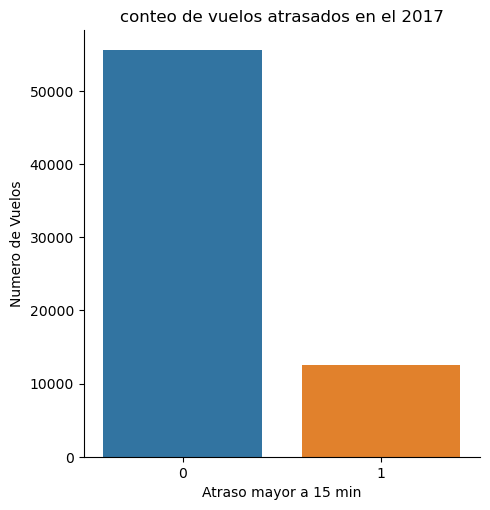

In [24]:
sns.catplot(
    data= dataset_SCL,
    x='atraso_15',
    kind='count',
)
plt.xlabel('Atraso mayor a 15 min')
plt.ylabel('Numero de Vuelos')
plt.title('conteo de vuelos atrasados en el 2017')
plt.show()

- Podemos observar que 12606 vuelos correspondiendo al 18.5% del 2017 presentaron retraso un retraso de minimo 15 minutos.

In [ ]:
# porcentaje de dias con retraso
dataset_SCL.loc[dataset_SCL['atraso_15']=='1','Fecha-I'].dt.date.nunique()/dataset_SCL['Fecha-I'].dt.date.nunique()*100

Vemos que todos los dias se presento al menos un atraso de 15 minutos

Creamos una tabla de contingencia la cual nos entrega el numero de vuelos con atraso o no para cada Aerolinea, esto con  el fin de ver si hay aerolineas que tienden a presentar atraso o no.

In [ ]:
# Crear tabla de contingencia
top_opera_atraso = pd.crosstab(dataset_SCL['OPERA'], dataset_SCL['atraso_15']).reset_index()

# Calcualo del total de vuelos por operador(Aerolinea)
top_opera_atraso['total'] = top_opera_atraso['0'] + top_opera_atraso['1']
top_opera_atraso['Porcentaje_anual'] =  top_opera_atraso['total'] / top_opera_atraso['total'].sum() *100

# Porcentaje de atraso o no por Aerolinea 
top_opera_atraso['Porcentaje_0'] = top_opera_atraso['0'] / top_opera_atraso['total']*100
top_opera_atraso['Porcentaje_1'] = top_opera_atraso['1'] / top_opera_atraso['total']*100

# top 10 de operador con tasa de atraso mayor a 15 min en la operacion anual
top_opera_atraso.sort_values('1', ascending=False).head(10)

- Obtenemos el top 10 de los operdores que presentan atrasos superiores a 15 minutos, sin embargo esta medida debe ser contrastada con la cantidad de vuelos anuales y tambien por operador

In [ ]:
# top 10 de operador con tasa de atraso mayor a 15 min en su operacion
top_opera_atraso.sort_values(['Porcentaje_1','Porcentaje_anual'],ascending=False).head(10)

Continuamos con el analisis por operador, cambio en nuemero de vuelo, cambio en el codigo de la aerolinea en funcion del atraso

In [ ]:
cols = ['OPERA', 'Vlo_change', 'Emp_change', 'atraso_15']

dataset_SCL_melt= dataset_SCL[cols].melt(id_vars='atraso_15', var_name='cols')
g = sns.displot(
    data=dataset_SCL_melt,
    x='value',
    col='cols',
    hue='atraso_15',
    multiple='fill',
    stat='proportion',
    col_wrap=3,
    facet_kws={'sharey': False, 'sharex': False}
)

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.axhline(y=0.5, color='red', linestyle='--')

Analisis por tipo de vuelo, mes del anio y dia de la semana en funcion del atraso

In [ ]:
cols = ['TIPOVUELO', 'MESNOM', 'DIANOM','atraso_15']

dataset_SCL_melt= dataset_SCL[cols].melt(id_vars='atraso_15', var_name='cols')
g = sns.displot(
    data=dataset_SCL_melt,
    x='value',
    col='cols',
    hue='atraso_15',
    multiple='fill',
    stat='proportion',
    col_wrap=3,
    facet_kws={'sharey': False, 'sharex': False}
)

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.axhline(y=0.5, color='red', linestyle='--')

Con esta tabla observamos:
- El Grupo Latam tiene una tasa del 60% en vuelos con atraso mayores a 15 min para el 2017 en la operacion total de vuelos, seguido por Sky Airlines con un 21% y Latin American Wings con 2.5%
- El Grupo Latam tiene una tasa de atraso del 18% dentro de su operacion en el aeropuerto SCL, Plus Ultra Lineas Aereas con tasa de operacion 61% esta en el primer puesto,  seguido por Qantas Airways con 58%
- Se observa que los vuelo que presentan cambio en su numero de vuelo tiene mas vuelos atrasados
- No hay una diferencia clara entre los vuelos que cambia de Código aerolínea y el atraso
- Los vuelos internacionales son los que mayor tasa de atraso presentan
- Los meses de Julio, Octubre y Diciembre son los meses con mayor tasa de atraso
- Los Lunes, Jueves y Viernes son los dias con mayor tasa de atraso

### Creacion de nueva columna Temporada alta
En general, "loc" es más adecuado para seleccionar y manipular filas y columnas específicas en un DataFrame, mientras que "np.where" es más adecuado para aplicar operaciones matemáticas y lógicas complejas a los datos.

En la creacion de la nueva feature 'temporada_alta' usamos una mascara con las condicionales necesarias y nos aprovechamos del conocimiento previo de solo tener un anio(2017).
- Como solo tenemos un anio no es necesario hacer una automatizacion de selecion de fechas o algo por el estilo.
- Como nuestra fecha tiene el formato fechas y hora debemos ser precavidos, porque al momento de elegir una fecha menor o igual(<=) el escogera hata las 00 horas de la fecha indicada, asi que debemos agregar un dia mas para seleccione todos los registro de mi fecha limite que va hasta las 23:59 horas, ejemplo: la fecha 3-Mar, debemos colocar en la condicion la fecha 4-Mar, para seleccionar todo el dia 3-mar.
- En la condicion de 1 si Fecha-I está entre 15-Dic y 3-Mar y cambiamos un poco la condicion de 15-Dic o 3-Mar, para que pueda seleccionar el rango de fechas solicitado, esto no afecta el resultado para este caso particular

Validacion y analisis de datos
- cual es la distribucion de la temporada? que nos indica?
- Que porcentaje de vuelos estan en temporada alta?

In [ ]:
# creacion de mascara
temporada_alta = ((dataset_SCL['Fecha-I']>='2017-12-15') | (dataset_SCL['Fecha-I']<='2017-03-04')) | \
    ((dataset_SCL['Fecha-I']>='2017-07-15') & (dataset_SCL['Fecha-I']<='2017-08-01')) | \
        ((dataset_SCL['Fecha-I']>='2017-09-11') & (dataset_SCL['Fecha-I']<='2017-10-01'))

# podemos hacerlo con .loc tambien 
dataset_SCL['temporada_alta'] = np.where(temporada_alta, '1', '0')

# Validación en porcentaje
dataset_SCL['temporada_alta'].value_counts(normalize = True)*100

In [ ]:
# porcentaje de dias en temporada alta
dataset_SCL.loc[dataset_SCL['temporada_alta']=='1','Fecha-I'].dt.date.nunique()/dataset_SCL['Fecha-I'].dt.date.nunique()*100

### Crear la columna 'periodo_dia'

In [ ]:
# Crear la columna 'periodo_dia'
dataset_SCL['periodo_dia'] = dataset_SCL.apply(categorized_days_periods, axis=1)
dataset_SCL['periodo_dia'].value_counts(normalize = True)*100

In [ ]:
# Validación la correcta creacion de periodo
dataset_SCL['HORA']=dataset_SCL['Fecha-I'].dt.hour
dataset_SCL.groupby(by=['periodo_dia','HORA']).size()

In [ ]:
cols = ['periodo_dia','temporada_alta', 'atraso_15']

dataset_SCL_melt= dataset_SCL[cols].melt(id_vars='atraso_15', var_name='cols')
g = sns.displot(
    data=dataset_SCL_melt,
    x='value',
    col='cols',
    hue='atraso_15',
    multiple='fill',
    stat='proportion',
    col_wrap=2,
    facet_kws={'sharey': False, 'sharex': False}
)

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.axhline(y=0.5, color='red', linestyle='--')

Observamos que: 
- Un 33% de los vuelos del anio 2017 fueron hechos en temporada alta
- El 31% o 116 dias del anio estan en temporada alta
- Hay poca diferencia entre el atraso y la temporada alta
- La noche presenta la menor tasa de vuelos del dia con 25.5%
- La mañana y tarde tiene tasas simimilares 37%
- La noche y la tarde tienen tasas similares respecto al atraso de vuelos
- La manana presenta una tasa menor que el resto del dia

Creamos una tabla de contingencia la cual nos entrega el numero de vuelos con atraso o no para cada ciudad de destino, esto con  el fin de ver si hay ciudades que tienden a presentar retraso o no.

In [ ]:
# Crear una tabla de contingencia
top_destinos = pd.crosstab(dataset_SCL['Des-I'], dataset_SCL['atraso_15']).reset_index()

# Calcualo del total de vuelos por destino
top_destinos['total'] = top_destinos['0'] + top_destinos['1']
top_destinos['Porcentaje_anual'] =  top_destinos['total'] / top_destinos['total'].sum() *100

# Porcentaje de atraso o no por destino 
top_destinos['Porcentaje_0'] = top_destinos['0'] / top_destinos['total']*100
top_destinos['Porcentaje_1'] = top_destinos['1'] / top_destinos['total']*100
# tabla_contingencia.describe()

# top 10 de destinos con atraso mayor a 15 min en el anio
top_destinos.sort_values('1', ascending=False).head(10)

In [ ]:
# top 10 de destinos con atraso mayor a 15 min en el anio SLCB
top_destinos.sort_values('total').head(10)

In [ ]:
# top 10 de destinos de tasa anual
top_destinos.sort_values(['Porcentaje_anual'],ascending=False).head(10)

In [ ]:
# top 10 de destinos con minimo de 12 vuelos al anio
top_destinos[top_destinos['total']>=12].sort_values(['Porcentaje_1'],ascending=False).head(10)

In [ ]:
# filtrar por cantidad de vuelos al anio
DesI_filter = top_destinos[top_destinos['total']<=12]['Des-I'].unique()
dataset_SCL = dataset_SCL[~dataset_SCL['Des-I'].isin(DesI_filter)]

Observamos que:
- Lima, Sao paulo y Antofagasta son las ciudades que mas cantidad de vuelos presentan atrasos y una tasa de retraso de 23%, 25% y 15% respectivamente.
- Lima, Sao paulo y Antofagasta tienen una tasa de vuelos anual de 7.7%, 5.2% y 8.4% respectivamente.
- Antofagasta, Lima y Calama son las ciudades que mas cantidad de vuelos presentan, Calama representa el 7.5% de tasa anual.
- ciudades con un pocos vuelos al anio presentaron un retraso superior a 15 min, lo que agregaria ruido a las metricas, por eso selecionamos que tenga como minimo 12 vuelos al anio
- Sydney, Melbourne y Rosario son los destinos con mayor tasa de atraso con 58%, 55% y 40% respectivamente

In [ ]:
cols = ['Des-I', 'atraso_15']
dataset_SCL_melt= dataset_SCL[cols].melt(id_vars='atraso_15', var_name='cols')

g = sns.displot(
    data=dataset_SCL_melt,
    x='value',
    col='cols',
    hue='atraso_15',
    multiple='fill',
    stat='proportion',
    col_wrap=1,
    height=5, 
    aspect=2,
    facet_kws={'sharey': False, 'sharex': False}
)
# plt.xlabel('Destinos')
# plt.ylabel('Proporcion')
# plt.title('Propocion de vuelos atrasados por destino')
# plt.setp(ax.get_xticklabels(), rotation=90)

for ax in g.axes:
    # plt.figure(figsize = (15, 8))
    plt.xlabel('Destinos')
    plt.ylabel('Proporcion')
    plt.title('Propocion de vuelos atrasados por destino')
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.axhline(y=0.5, color='red', linestyle='--')

In [ ]:
# Exportar las columnas adicionales a un archivo .csv
dataset_SCL.to_csv(path.data_processed_dir('synthetic_features.csv'), index=False)

3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
- Lima, Sao paulo y Antofagasta son las ciudades que mas cantidad de vuelos presentan atrasos y una tasa de retraso de 23%, 25% y 15% respectivamente.
-  El Grupo Latam tiene una tasa del 60% en vuelos con atraso mayores a 15 min para el 2017 en la operacion total de vuelos, seguido por Sky Airlines con un 21% y Latin American Wings con 2.5%
- El Grupo Latam tiene una tasa de atraso del 18% dentro de su operacion en el aeropuerto SCL, Plus Ultra Lineas Aereas con tasa de operacion 61% esta en el primer puesto,  seguido por Qantas Airways con 58%
- Los meses de Julio, Octubre y Diciembre son los meses con mayor tasa de atraso
- Los Lunes, Jueves y Viernes son los dias con mayor tasa de atraso
- Un 33% de los vuelos del anio 2017 fueron hechos en temporada alta
- El 31% o 116 dias del anio estan en temporada alta
- Hay poca diferencia entre el atraso y la temporada alta
- Los vuelos internacionales son los que mayor tasa de atraso presentan

¿Qué variables esperarías que más influyeran en predecir atrasos?

Las variables que espero que mas influyan al predecir un atraso son:
- Destino
- Aerolínea
- Mes del año
- Día de la semana
- Temporada
- Tipo de vuelo
- Cambio de número de vuelo
- Cambio de código aerolínea

Esto lo podremos verificar con un test de chi-cuadrado

In [ ]:
dataset_SCL.sample(5)

In [ ]:
# Creamos una variable minuto
dataset_SCL['MIN']=dataset_SCL['Fecha-I'].dt.minute

In [ ]:
dataset_SCL.head(5)

In [ ]:
dataset_SCL.columns

No usaremos las siguiente columnas:
- Fecha-I = creamos las columnas 'DIA', 'MES', 'AÑO',  'HORA', 'MIN' que le ayudaran al modelo a interpertar mejor el formato fecha.
- Vlo-I, Vlo-O = creamos las columna 'Vlo_change' que le ayudaran al modelo a interpertar mejor estas dos columnas.
- Emp-I, Emp-O = creamos las columna 'Emp_change' que le ayudaran al modelo a interpertar mejor estas dos columnas.
- Des-O = vimos que no representa gran variabilidad por eso se elimina por que no ayudaria al modelo a determinar un atraso.
- dif_min = por que esta correlacionada con con nuestr variable target 'atraso_15' ya se formo apartir de ella. 
- Fecha-O = hace parte de la creacion del targe. 
- SIGLADES = por que tenemos la columna 'Des-I' que resume mejor esta columna.

In [ ]:
data_train = dataset_SCL[['DIA', 'MES', 'AÑO',  'HORA', 'MIN', 'periodo_dia', 'DIANOM', 'MESNOM','Des-I', 'TIPOVUELO', 'OPERA', 'Vlo_change', 'Emp_change', 'temporada_alta', 'atraso_15']]
data_train.head(5)

In [ ]:
# Exportar las columnas adicionales a un archivo .csv
data_train.to_csv(path.data_processed_dir('data_train.csv'), index=False)

In [25]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE 
X, y = make_classification(n_classes=5, 
    class_sep=2, 
    weights=[0.15, 0.15, 0.1, 0.1, 0.5], 
    n_informative=4, 
    n_redundant=1, 
    flip_y=0,
    n_features=20, 
    n_clusters_per_class=1,
    n_samples=1000,
    random_state=10)

sample_strategy = {4: 500, 0: 500, 1: 150, 2: 100, 3: 100}

sm = SMOTE(sampling_strategy=sample_strategy, random_state=0)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({4: 500, 0: 500, 1: 150, 3: 100, 2: 100})


In [26]:
X

array([[ 0.01100555,  0.28275741, -1.15401276, ..., -0.76721122,
        -1.74673014,  2.00470101],
       [-1.23697692,  0.46976009, -1.59768652, ..., -1.01906176,
         1.64350349,  3.20444068],
       [ 0.49676335,  0.33648677, -2.45397131, ...,  1.19609421,
        -0.09635606,  2.35973292],
       ...,
       [ 0.23067553, -0.14050011, -1.03281287, ..., -0.95439772,
        -1.05010457,  0.2027728 ],
       [ 0.12918128,  0.0648892 , -2.83526427, ..., -0.43800233,
        -0.08908201, -3.84171755],
       [ 0.4958648 ,  0.21389937, -2.70280863, ..., -1.38934506,
        -0.13038127,  1.91191046]])